## Geo-visualization

This section prepares the data as geojson for online sharing using QGIS and GitHub

In [27]:
import pandas as pd
import geopandas as gpd

- Read data

In [28]:
# read data
data = pd.read_csv('data/CDFCollections240508csv.csv')

In [29]:
# create geodata
geodata = gpd.GeoDataFrame(data,
                           geometry = gpd.points_from_xy(x=data.LongitudeDecimal,
                                                         y=data.LatitudeDecimal), crs=4326)

- Read SHP

In [30]:
gps_layer = gpd.read_file('data/Islas_General_GPS.shp')

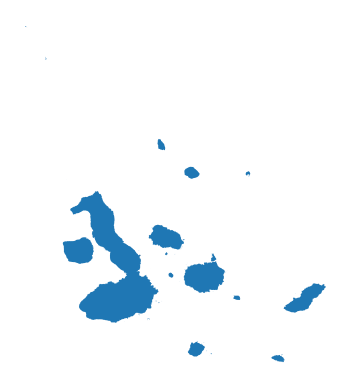

In [31]:
ax = gps_layer.plot();

ax.axis('off');

## Save raw data for preparation

The data was limited by the islands layer. It seems that not al coordinates are correctly.

In [32]:
raw_len = len(geodata)
raw_len

64765

In [33]:
geodata.to_file('viz/geodata_raw.gpkg')

### Clip operation

Get only overlapping info

In [34]:
geodata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
gps_layer.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
# clip only island info
geodata_gps = gpd.clip(geodata, gps_layer)

In [37]:
geodata_gps.to_file('viz/geodata_gps_info.geojson')